In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from scipy.stats import mannwhitneyu
import pandas as pd
import matplotlib.lines as mlines
import cartopy.crs as ccrs
import rioxarray
import cartopy.feature as cfeature

In [2]:
datapath = '/g/data/ng72/as9583/cylc-run/u-dr216/netcdf_new'
experiment1 = 'drysoil_d0198_RAL3P2_albedo_bare_' 
variable3 = 'land_sea_mask'
landmask = xr.open_dataset(f'{datapath}/{variable3}/{experiment1}{variable3}.nc')["land_binary_mask"].isel(time=0)
fires = gpd.read_file('/g/data/ng72/as9583/merged_fires.gpkg')

## outer

In [3]:
#outer domain 500hPa
outer_SM_500 = xr.open_dataset('/g/data/ng72/as9583/cylc-run/u-dr216/netcdf_new/geopotential_height_500hPa/drysoil_d1100_GAL9_geopotential_height_500hPa.nc')['geopotential_height']
outer_control_500 = xr.open_dataset('/g/data/ng72/as9583/cylc-run/u-dr216/netcdf_new/geopotential_height_500hPa/control_d1100_GAL9_geopotential_height_500hPa.nc')['geopotential_height']

outer_SM_500 = outer_SM_500.assign_coords(time=outer_SM_500.time + pd.Timedelta(hours=10))
outer_control_500 = outer_control_500.assign_coords(time=outer_control_500.time + pd.Timedelta(hours=10))

In [4]:
#outer domain 850hPa
outer_SM_850 = xr.open_dataset('/g/data/ng72/as9583/cylc-run/u-dr216/netcdf_new/geopotential_height_850hPa/drysoil_d1100_GAL9_geopotential_height_850hPa.nc')['geopotential_height']
outer_control_850 = xr.open_dataset('/g/data/ng72/as9583/cylc-run/u-dr216/netcdf_new/geopotential_height_850hPa/control_d1100_GAL9_geopotential_height_850hPa.nc')['geopotential_height']

outer_SM_850 = outer_SM_850.assign_coords(time=outer_SM_850.time + pd.Timedelta(hours=10))
outer_control_850 = outer_control_850.assign_coords(time=outer_control_850.time + pd.Timedelta(hours=10))

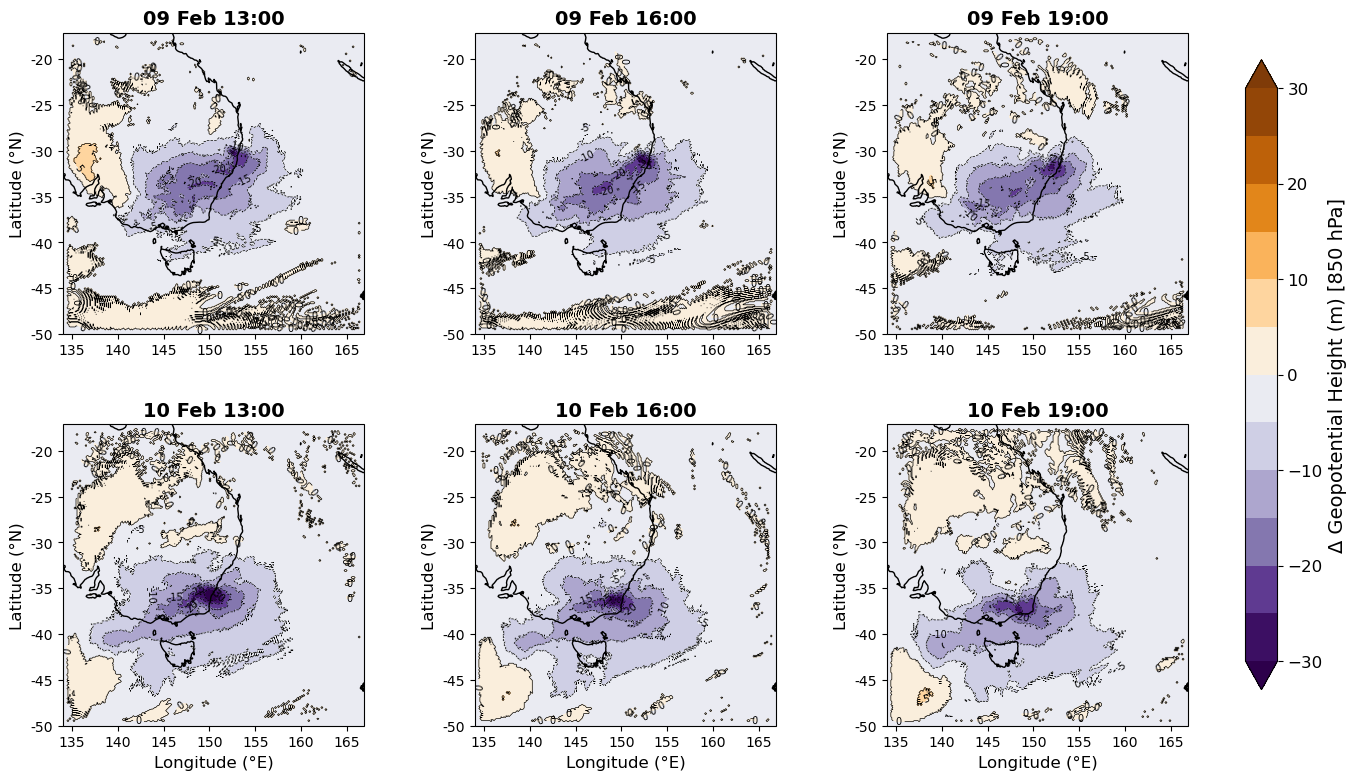

In [5]:
#outer,850hPa


##times to plot
hours = [13, 16, 19]  # 1pm, 4pm, 7pm
dates = ["2020-02-09", "2020-02-10"]
levels = np.arange(-30, 34, 5)
proj = ccrs.PlateCarree()

#figure
fig, axes = plt.subplots(
    nrows=2, ncols=3, 
    figsize=(16, 9),
    subplot_kw={'projection': proj},
    gridspec_kw={'wspace': -0.01, 'hspace': 0.3}
)

#---loop over rows (dates) and columns (hours)
for i, date in enumerate(dates):           # 0 = 9 Feb, 1 = 10 Feb
    for j, hour in enumerate(hours):       # 1pm, 4pm, 7pm
        ax = axes[i, j]
        target_time = np.datetime64(f"{date}T{hour:02d}:00")

        #data
        outer_control_t = outer_control_850.sel(time=target_time, method="nearest")
        outer_SM_t = outer_SM_850.sel(time=target_time, method="nearest")

        #diff
        diff_outer = outer_SM_t - outer_control_t

        #contours
        cf = ax.contourf(
            diff_outer['longitude'], diff_outer['latitude'], diff_outer,
            cmap='PuOr_r', extend='both', levels=levels, transform=proj
        )

        #contour lines
        contours = ax.contour(
            diff_outer['longitude'], diff_outer['latitude'], diff_outer,
            colors='black', linewidths=0.5, levels=levels, transform=proj
        )
        ax.clabel(contours, inline=True, fontsize=7, fmt="%.0f")

        ax.coastlines(resolution='50m', linewidth=1)
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)

        #titles
        ax.set_title(f"{date[-2:]} Feb {hour}:00", fontsize=14, fontweight = 'bold')
        ax.set_yticks(np.arange(-50, -15, 5), crs=proj)
        ax.set_yticklabels([f"{lat}" for lat in np.arange(-50, -15, 5)], fontsize=10)
        ax.set_xticks(np.arange(135, 170, 5), crs=proj)
        ax.set_xticklabels([f"{lon}" for lon in np.arange(135, 170, 5)], fontsize=10)
        ax.set_ylabel("Latitude (°N)", fontsize=12)
        if i == len(dates) - 1:  
            ax.set_xlabel("Longitude (°E)", fontsize=12)


#cbar
cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7]) 
cbar = fig.colorbar(cf, cax=cbar_ax)
cbar.set_label("Δ Geopotential Height (m) [850 hPa]", fontsize=14)
cbar.ax.tick_params(labelsize=12)

# plt.savefig('/g/data/ng72/as9583/new_analysis/figures/gph_progression.png', dpi = 300, bbox_inches = 'tight')
plt.show()


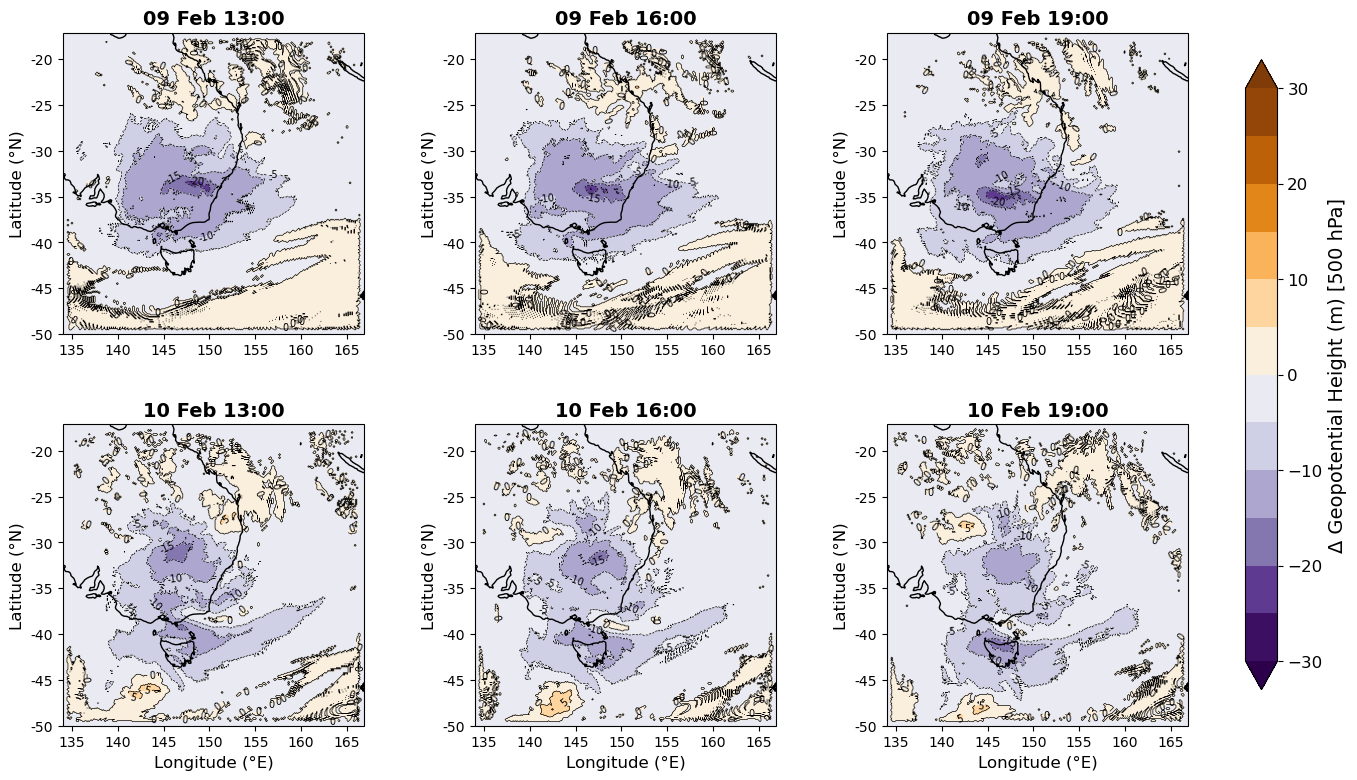

In [6]:
#outer, 500hPa


#times to plot
hours = [13, 16, 19]  # 1pm, 4pm, 7pm
dates = ["2020-02-09", "2020-02-10"]
levels = np.arange(-20,24,4)
levels = np.arange(-30, 34, 5)
proj = ccrs.PlateCarree()

#figure
fig, axes = plt.subplots(
    nrows=2, ncols=3, 
    figsize=(16, 9),
    subplot_kw={'projection': proj},
    gridspec_kw={'wspace': -0.01, 'hspace': 0.3}
    # constrained_layout=True
)

#---loop over rows (dates) and columns (hours)---
for i, date in enumerate(dates):           # 0 = 9 Feb, 1 = 10 Feb
    for j, hour in enumerate(hours):       # 1pm, 4pm, 7pm
        ax = axes[i, j]
        target_time = np.datetime64(f"{date}T{hour:02d}:00")

        outer_control_t = outer_control_500.sel(time=target_time, method="nearest")
        outer_SM_t = outer_SM_500.sel(time=target_time, method="nearest")

        diff_outer = outer_SM_t - outer_control_t

        cf = ax.contourf(
            diff_outer['longitude'], diff_outer['latitude'], diff_outer,
            cmap='PuOr_r', extend='both', levels=levels, transform=proj
        )

        contours = ax.contour(
            diff_outer['longitude'], diff_outer['latitude'], diff_outer,
            colors='black', linewidths=0.5, levels=levels, transform=proj
        )
        ax.clabel(contours, inline=True, fontsize=7, fmt="%.0f")

        ax.coastlines(resolution='50m', linewidth=1)
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)

        ax.set_title(f"{date[-2:]} Feb {hour}:00", fontsize=14, fontweight = 'bold')
        ax.set_yticks(np.arange(-50, -15, 5), crs=proj)
        ax.set_yticklabels([f"{lat}" for lat in np.arange(-50, -15, 5)], fontsize=10)
        ax.set_xticks(np.arange(135, 170, 5), crs=proj)
        ax.set_xticklabels([f"{lon}" for lon in np.arange(135, 170, 5)], fontsize=10)
        ax.set_ylabel("Latitude (°N)", fontsize=12)
        if i == len(dates) - 1: 
            ax.set_xlabel("Longitude (°E)", fontsize=12)

cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
cbar = fig.colorbar(cf, cax=cbar_ax)
cbar.set_label("Δ Geopotential Height (m) [500 hPa]", fontsize=14)
cbar.ax.tick_params(labelsize=12)

# plt.savefig('/g/data/ng72/as9583/new_analysis/figures/gph_progression_500.png', dpi = 300, bbox_inches = 'tight')
plt.show()


## inner

In [7]:
#inner domain 500hPa
inner_SM_500 = xr.open_dataset('/g/data/ng72/as9583/cylc-run/u-dr216/netcdf_new/geopotential_height_500hPa/drysoil_d0198_RAL3P2_geopotential_height_500hPa.nc')['geopotential_height']
inner_control_500 = xr.open_dataset('/g/data/ng72/as9583/cylc-run/u-dr216/netcdf_new/geopotential_height_500hPa/control_d0198_RAL3P2_geopotential_height_500hPa.nc')['geopotential_height']

inner_SM_500 = inner_SM_500.assign_coords(time=inner_SM_500.time + pd.Timedelta(hours=10))
inner_control_500 = inner_control_500.assign_coords(time=inner_control_500.time + pd.Timedelta(hours=10))


#inner domain 850hPa
inner_SM_850 = xr.open_dataset('/g/data/ng72/as9583/cylc-run/u-dr216/netcdf_new/geopotential_height_850hPa/drysoil_d0198_RAL3P2_geopotential_height_850hPa.nc')['geopotential_height']
inner_control_850 = xr.open_dataset('/g/data/ng72/as9583/cylc-run/u-dr216/netcdf_new/geopotential_height_850hPa/control_d0198_RAL3P2_geopotential_height_850hPa.nc')['geopotential_height']

inner_SM_850 = inner_SM_850.assign_coords(time=inner_SM_850.time + pd.Timedelta(hours=10))
inner_control_850 = inner_control_850.assign_coords(time=inner_control_850.time + pd.Timedelta(hours=10))

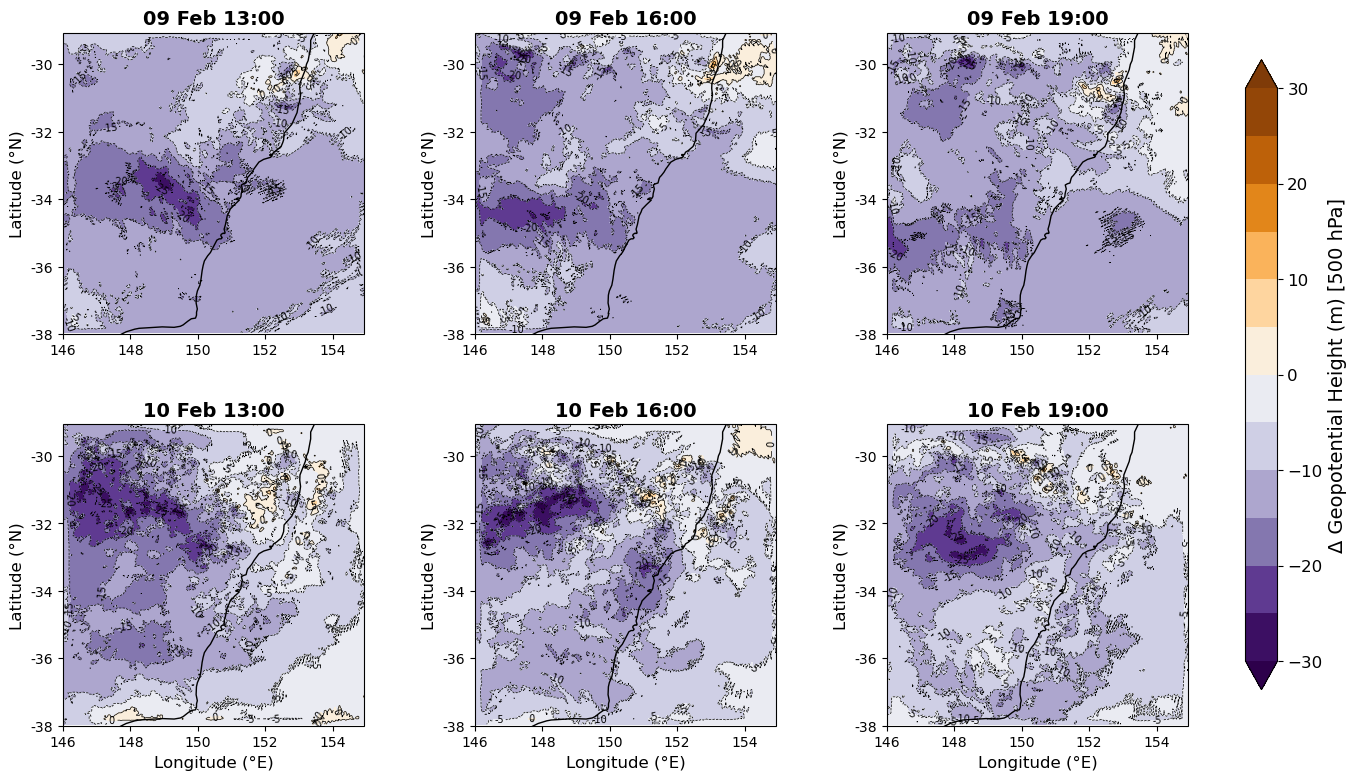

In [8]:
#inner, 500hPa


hours = [13, 16, 19]  # 1pm, 4pm, 7pm
dates = ["2020-02-09", "2020-02-10"]
levels = np.arange(-40, 45, 5)
levels = np.arange(-30, 35, 5)
proj = ccrs.PlateCarree()

#figure
fig, axes = plt.subplots(
    nrows=2, ncols=3, 
    figsize=(16, 9),
    subplot_kw={'projection': proj},
    gridspec_kw={'wspace': -0.01, 'hspace': 0.3}
)

#---loop over rows (dates) and columns (hours)---
for i, date in enumerate(dates):           # 0 = 9 Feb, 1 = 10 Feb
    for j, hour in enumerate(hours):       # 1pm, 4pm, 7pm
        ax = axes[i, j]
        target_time = np.datetime64(f"{date}T{hour:02d}:00")

        inner_control_t = inner_control_500.sel(time=target_time, method="nearest")
        inner_SM_t = inner_SM_500.sel(time=target_time, method="nearest")

        diff_inner = inner_SM_t - inner_control_t

        cf = ax.contourf(
            diff_inner['longitude'], diff_inner['latitude'], diff_inner,
            cmap='PuOr_r', extend='both', levels=levels, transform=proj
        )

        contours = ax.contour(
            diff_inner['longitude'], diff_inner['latitude'], diff_inner,
            colors='black', linewidths=0.5, levels=levels, transform=proj
        )
        ax.clabel(contours, inline=True, fontsize=7, fmt="%.0f")

        ax.coastlines(resolution='50m', linewidth=1)
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)

        ax.set_title(f"{date[-2:]} Feb {hour}:00", fontsize=14, fontweight = 'bold')
        ax.set_yticks(np.arange(-38, -28, 2), crs=proj)
        ax.set_yticklabels([f"{lat}" for lat in np.arange(-38, -28, 2)], fontsize=10)
        ax.set_xticks(np.arange(146, 155, 2), crs=proj)
        ax.set_xticklabels([f"{lon}" for lon in np.arange(146, 155, 2)], fontsize=10)
        ax.set_ylabel("Latitude (°N)", fontsize=12)
        if i == len(dates) - 1: 
            ax.set_xlabel("Longitude (°E)", fontsize=12)


#cbar
cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7]) 
cbar = fig.colorbar(cf, cax=cbar_ax)
cbar.set_label("Δ Geopotential Height (m) [500 hPa]", fontsize=14)
cbar.ax.tick_params(labelsize=12)

# plt.savefig('/g/data/ng72/as9583/new_analysis/figures/gph_progression_500_inner.png', dpi = 300, bbox_inches = 'tight')
plt.show()


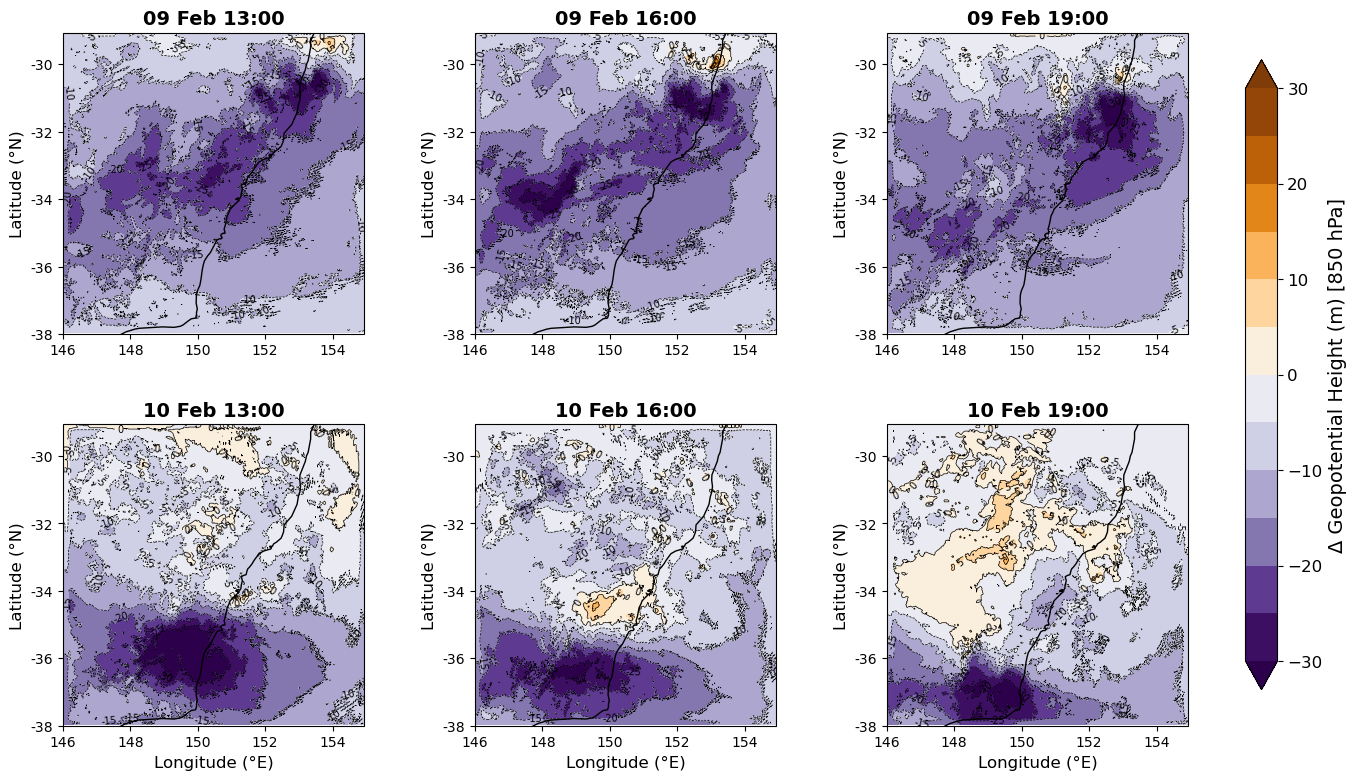

In [9]:
#inner, 850hPa


hours = [13, 16, 19]  # 1pm, 4pm, 7pm
dates = ["2020-02-09", "2020-02-10"]
levels = np.arange(-40, 45, 5)
levels = np.arange(-30, 35, 5)
proj = ccrs.PlateCarree()

#figure
fig, axes = plt.subplots(
    nrows=2, ncols=3, 
    figsize=(16, 9),
    subplot_kw={'projection': proj},
    gridspec_kw={'wspace': -0.01, 'hspace': 0.3}
)

#---loop over rows (dates) and columns (hours)---
for i, date in enumerate(dates):           # 0 = 9 Feb, 1 = 10 Feb
    for j, hour in enumerate(hours):       # 1pm, 4pm, 7pm
        ax = axes[i, j]
        target_time = np.datetime64(f"{date}T{hour:02d}:00")

        inner_control_t = inner_control_850.sel(time=target_time, method="nearest")
        inner_SM_t = inner_SM_850.sel(time=target_time, method="nearest")

        diff_inner = inner_SM_t - inner_control_t

        cf = ax.contourf(
            diff_inner['longitude'], diff_inner['latitude'], diff_inner,
            cmap='PuOr_r', extend='both', levels=levels, transform=proj
        )

        contours = ax.contour(
            diff_inner['longitude'], diff_inner['latitude'], diff_inner,
            colors='black', linewidths=0.5, levels=levels, transform=proj
        )
        ax.clabel(contours, inline=True, fontsize=7, fmt="%.0f")

        ax.coastlines(resolution='50m', linewidth=1)
        ax.add_feature(cfeature.BORDERS, linewidth=0.5)

        ax.set_title(f"{date[-2:]} Feb {hour}:00", fontsize=14, fontweight = 'bold')
        ax.set_yticks(np.arange(-38, -28, 2), crs=proj)
        ax.set_yticklabels([f"{lat}" for lat in np.arange(-38, -28, 2)], fontsize=10)
        ax.set_xticks(np.arange(146, 155, 2), crs=proj)
        ax.set_xticklabels([f"{lon}" for lon in np.arange(146, 155, 2)], fontsize=10)
        ax.set_ylabel("Latitude (°N)", fontsize=12)
        if i == len(dates) - 1: 
            ax.set_xlabel("Longitude (°E)", fontsize=12)


#cbar
cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])  # x, y, width, height
cbar = fig.colorbar(cf, cax=cbar_ax)
cbar.set_label("Δ Geopotential Height (m) [850 hPa]", fontsize=14)
cbar.ax.tick_params(labelsize=12)

# plt.savefig('/g/data/ng72/as9583/new_analysis/figures/gph_progression_850_inner.png', dpi = 300, bbox_inches = 'tight')
plt.show()
